In [1]:
import csv
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.arima_model 
from datetime import datetime, timedelta
from statsmodels.graphics.api import qqplot

In [2]:
df_data = pd.read_csv('data/preprocessed_input.csv')

In [3]:
df_data

,datetime,dayofweek,hour,dt0_10_total_vol,dt20_10_total_vol,dt40_10_total_vol,dt60_10_total_vol,dt80_10_total_vol,dt100_10_total_vol,dt120_10_total_vol,...,dt0_rel_humidity,dt0_precipitation,dt180_pressure,dt180_sea_pressure,dt180_wind_direction,dt180_wind_speed,dt180_temperature,dt180_rel_humidity,dt180_precipitation,is_holiday
0,2016-09-20 00:00:00,1,0,14,13,7,6,5,5,6,...,68.0,0.0,1013.5,1018.5,354.0,2.6,23.9,58.0,0.0,0
1,2016-09-20 03:00:00,1,3,10,8,5,11,8,15,9,...,58.0,0.0,1012.2,1017.2,7.0,4.6,26.9,43.0,0.0,0
2,2016-09-20 06:00:00,1,6,13,20,29,38,30,31,53,...,43.0,0.0,1012.6,1017.6,11.0,4.5,25.4,42.0,0.0,0
3,2016-09-20 09:00:00,1,9,51,68,59,56,60,63,57,...,42.0,0.0,1013.7,1018.7,25.0,1.7,22.1,53.0,0.0,0
4,2016-09-20 12:00:00,1,12,53,62,75,98,82,84,81,...,53.0,0.0,1014.0,1019.0,326.0,2.2,20.5,65.0,0.0,0
5,2016-09-20 15:00:00,1,15,71,64,73,48,57,48,38,...,65.0,0.0,1013.8,1018.8,327.0,1.4,19.4,74.0,0.0,0
6,2016-09-20 18:00:00,1,18,26,29,20,17,29,21,12,...,74.0,0.0,1014.1,1019.1,330.0,1.0,18.6,80.0,0.0,0
7,2016-09-20 21:00:00,1,21,17,29,37,30,17,19,20,...,80.0,0.0,1015.5,1020.5,219.0,0.7,21.7,69.0,0.0,0
8,2016-09-21 00:00:00,2,0,12,6,7,7,4,6,6,...,69.0,0.0,1015.4,1020.4,17.0,2.4,25.2,59.0,0.0,0
9,2016-09-21 03:00:00,2,3,5,6,10,16,14,11,10,...,59.0,0.0,1013.1,1018.1,328.0,3.0,26.2,56.0,0.0,0


In [4]:
df_travel_time = df_data.filter(regex='A2_routetime_median').fillna(0)
df_travel_time

,dt0_A2_routetime_median,dt20_A2_routetime_median,dt40_A2_routetime_median,dt60_A2_routetime_median,dt80_A2_routetime_median,dt100_A2_routetime_median
0,65.775,0.000,54.330,0.000,50.910,58.850
1,44.105,46.010,75.460,43.580,60.940,47.320
2,0.000,93.190,41.090,71.140,55.660,56.325
3,67.690,60.060,82.450,71.680,54.290,79.190
4,65.480,77.855,65.260,68.890,74.820,52.730
5,52.320,60.850,50.560,72.330,87.900,61.875
6,66.220,64.130,60.010,51.820,42.050,74.705
7,92.970,59.895,44.530,39.325,44.590,43.720
8,57.155,38.545,32.300,102.170,0.000,43.520
9,52.120,40.480,38.000,67.500,26.080,50.970


## Create Time Axis

In [5]:
time_len = len(df_travel_time)*len(df_travel_time.iloc[0,:])
travel_time_index = [pd.to_datetime(df_data.iloc[0,0])]*time_len + \
np.arange(time_len)*timedelta(hours=0.5)
travel_time_index

array([Timestamp('2016-09-20 00:00:00'), Timestamp('2016-09-20 00:30:00'),
       Timestamp('2016-09-20 01:00:00'), ...,
       Timestamp('2016-10-18 01:30:00'), Timestamp('2016-10-18 02:00:00'),
       Timestamp('2016-10-18 02:30:00')], dtype=object)

## Create Indexed Route Travel Time Axis

In [6]:
travel_time = pd.Series(pd.DataFrame.as_matrix(df_travel_time).reshape(-1))
travel_time.index = pd.Index(travel_time_index)
travel_time    

2016-09-20 00:00:00    65.775
2016-09-20 00:30:00     0.000
2016-09-20 01:00:00    54.330
2016-09-20 01:30:00     0.000
2016-09-20 02:00:00    50.910
2016-09-20 02:30:00    58.850
2016-09-20 03:00:00    44.105
2016-09-20 03:30:00    46.010
2016-09-20 04:00:00    75.460
2016-09-20 04:30:00    43.580
2016-09-20 05:00:00    60.940
2016-09-20 05:30:00    47.320
2016-09-20 06:00:00     0.000
2016-09-20 06:30:00    93.190
2016-09-20 07:00:00    41.090
2016-09-20 07:30:00    71.140
2016-09-20 08:00:00    55.660
2016-09-20 08:30:00    56.325
2016-09-20 09:00:00    67.690
2016-09-20 09:30:00    60.060
2016-09-20 10:00:00    82.450
2016-09-20 10:30:00    71.680
2016-09-20 11:00:00    54.290
2016-09-20 11:30:00    79.190
2016-09-20 12:00:00    65.480
2016-09-20 12:30:00    77.855
2016-09-20 13:00:00    65.260
2016-09-20 13:30:00    68.890
2016-09-20 14:00:00    74.820
2016-09-20 14:30:00    52.730
                        ...  
2016-10-17 12:00:00    57.520
2016-10-17 12:30:00    46.925
2016-10-17

In [7]:
sm.tsa.stattools.adfuller(travel_time)[:2]

(-8.7080069793290651, 3.6554064007514354e-14)

The p-value << 0.05, so we reject the null hypothesis that there is a unit root. No differencing is required.

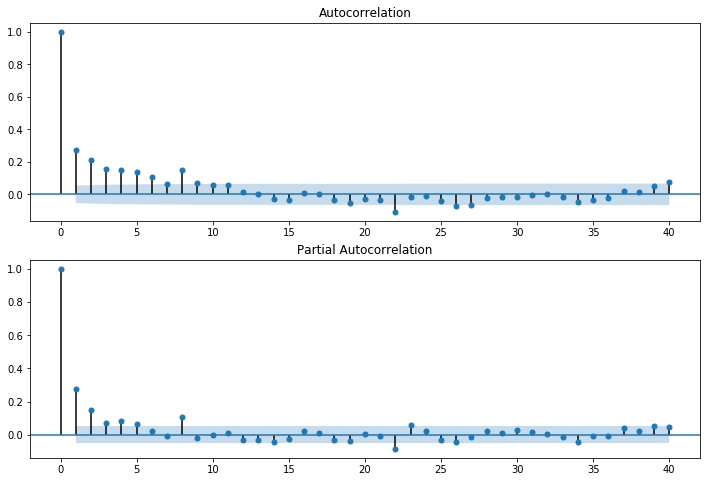

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(travel_time.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(travel_time, lags=40, ax=ax2)
fig

ACF plot shows this is a MA(l) model, where l>=1

PACF plot shows this is a AR(k) model, where k>=1

In [41]:
travel_ts=statsmodels.tsa.arima_model.ARIMA(travel_time, (1,0,1)).fit()

In [42]:
print travel_ts.params

const      55.347168
ar.L1.y     0.839926
ma.L1.y    -0.646639
dtype: float64


In [43]:
print travel_ts.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1350
Model:                     ARMA(1, 1)   Log Likelihood               -6119.951
Method:                       css-mle   S.D. of innovations             22.517
Date:                Tue, 02 May 2017   AIC                          12247.903
Time:                        03:00:51   BIC                          12268.734
Sample:                    09-20-2016   HQIC                         12255.704
                         - 10-18-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3472      1.350     40.987      0.000      52.701      57.994
ar.L1.y        0.8399      0.037     22.708      0.000       0.767       0.912
ma.L1.y       -0.6466      0.052    -12.494      0.0

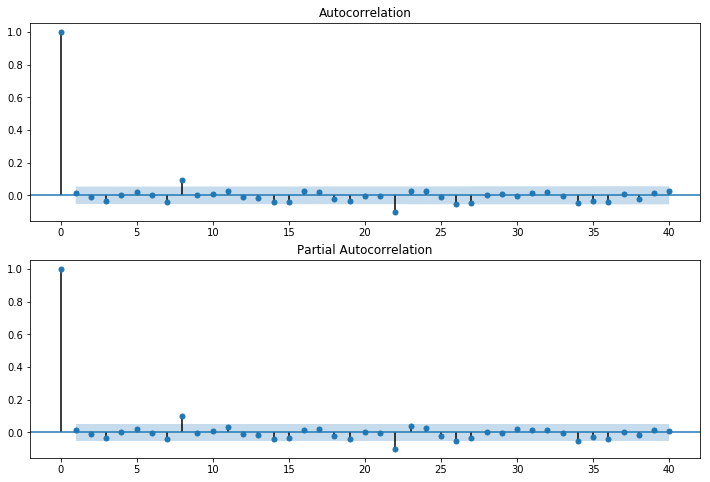

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(travel_ts.resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(travel_ts.resid, lags=40, ax=ax2)
fig

The ACF and PACF plots show the residual of the model is white noise, hence showing as a good predictive model.

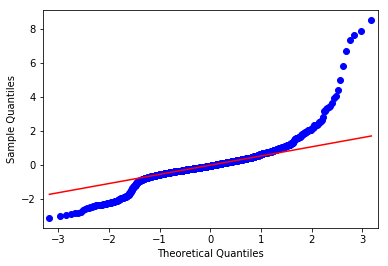

In [46]:
resid = travel_ts.resid
qqplot(resid,line='q',fit=True)

The points approximately lie in the line y=x, providing evidence of standard normal distribution. 

In [47]:
resid

2016-09-20 00:00:00    10.427832
2016-09-20 00:30:00   -58.121794
2016-09-20 01:00:00     9.576093
2016-09-20 01:30:00   -48.414798
2016-09-20 02:00:00    10.983152
2016-09-20 02:30:00    14.309194
2016-09-20 03:00:00    -4.943737
2016-09-20 03:30:00    -3.089610
2016-09-20 04:00:00    25.957966
2016-09-20 04:30:00   -11.876666
2016-09-20 05:00:00     7.796783
2016-09-20 05:30:00    -7.683117
2016-09-20 06:00:00   -53.573107
2016-09-20 06:30:00    49.688014
2016-09-20 07:00:00   -13.912191
2016-09-20 07:30:00    18.771641
2016-09-20 08:00:00    -0.813510
2016-09-20 08:30:00     0.189029
2016-09-20 09:00:00    11.643759
2016-09-20 09:30:00     1.875072
2016-09-20 10:00:00    24.356896
2016-09-20 10:30:00     9.318571
2016-09-20 11:00:00    -8.749790
2016-09-20 11:30:00    19.072822
2016-09-20 12:00:00     2.439843
2016-09-20 12:30:00    15.574699
2016-09-20 13:00:00     1.079122
2016-09-20 13:30:00     5.914589
2016-09-20 14:00:00    11.922457
2016-09-20 14:30:00   -11.263384
          